In [1]:
# Importing libraries
import numpy as np
import pandas as pd 

In [2]:
# dataset can get from kaggle 
# https://www.kaggle.com/datasets/absin7/zomato-bangalore-dataset?select=dictionary_data.txt
# Loading dataset
data = pd.read_csv('zomato.csv')
data.head() #print the first 5 rows

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# looking at the info. about dataset, datatypes of the corresponding columns and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
# Null values
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
data['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [6]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

As our aim is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, we will remove certain columns that are not of much help to us. First we will remove 'url' column as it does not play a major role. 'Address' can also be removed because 'location' is a much easier and better feature to analyze as compared to 'address'. 'Phone' will also be removed.

As we can observe the 'location' field offers more precise location as compared to the column 'listed_in(city)' column, we will use the 'location' column.

In [7]:
data.drop(['url','address','phone','listed_in(city)'], axis = 1, inplace = True)

In [8]:
data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def missing_values(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize = 20, weight = 'bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 12.5, f'Columns with more than {thresh}% missing values', fontsize = 12, color = 'crimson',
         ha = 'left' ,va = 'top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha = 'left' ,va = 'top')
    plt.xlabel('Columns', size = 15, weight = 'bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight = 'bold')
    
    return plt.show()

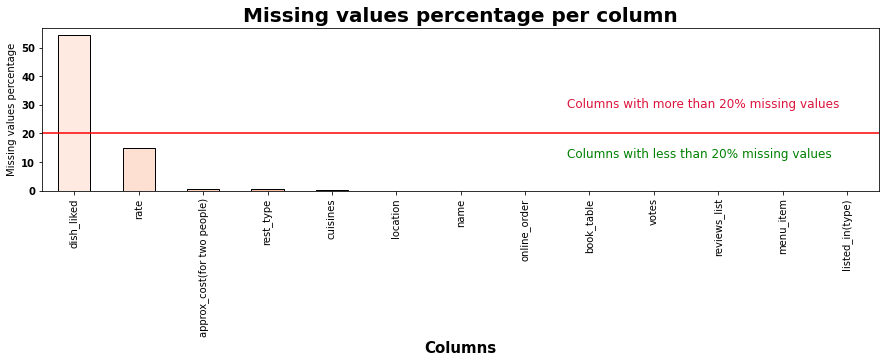

In [10]:
missing_values(data, thresh= 20, color = sns.color_palette('Reds',15))

We will remove the 'dish_liked' column as it contains more than 50% missing values.

In [11]:
data.drop(['dish_liked'], axis = 1, inplace = True)

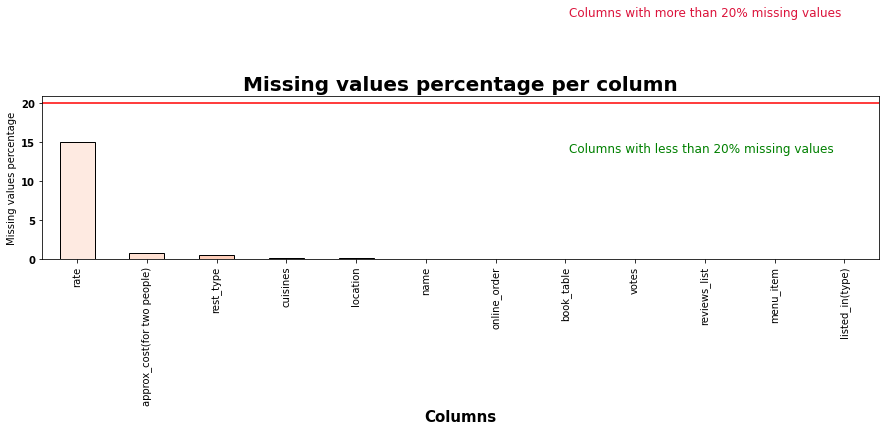

In [12]:
missing_values(data, thresh= 20, color = sns.color_palette('Reds',15))

For the null values present in the 'rate' column, we will replace them with the mode of the 'rate' column. We can not remove this column, because we won't have any dependent column left with us once we remove it.

In [13]:
data['rate'] = data['rate'].fillna(data['rate'].mode()[0])

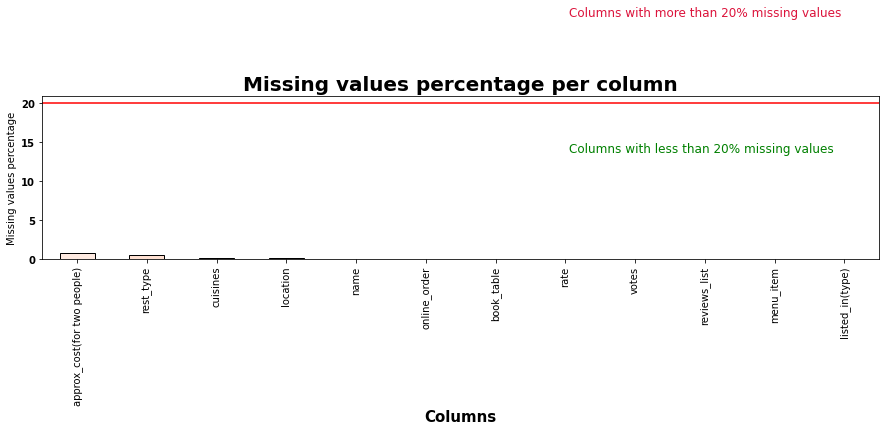

In [14]:
missing_values(data, thresh = 20, color = sns.color_palette('Reds',15))

We will remove the rows having null values for the above column

In [15]:
previous_data = data
data.dropna(inplace = True)

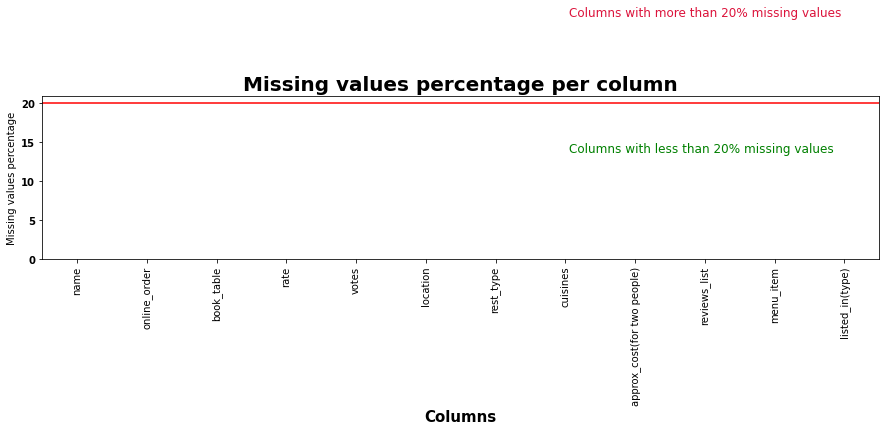

In [16]:
missing_values(data, thresh = 20, color = sns.color_palette('Reds',15))

In [17]:
data.isnull().sum().sum()

0

Therefore, no null values are present in the dataset. Let's move onto the analysis part.

In [18]:
print("Number of rows present in the dataset are:", data.shape[0])
print("Number of columns present in the dataset are:", data.shape[1])

Number of rows present in the dataset are: 51148
Number of columns present in the dataset are: 12


# Rating Distribution

In [19]:
data['rate'].value_counts()

NEW       9820
3.9/5     2091
3.7/5     2008
3.8/5     1999
3.9 /5    1867
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

We can see a category named 'new' which indicates that the restaurant is fairly new, hence we will replace the value 'new' with '2.5' as it can be mode as well as bad..we don't know that yet. Please note we will replace with '2.5 /5' for maintaing uniform format.

In [20]:
print("rate column type:", type(data['rate'][0]))

rate column type: <class 'str'>


In [21]:
data['rate'].replace({"NEW" : "2.5 /5"}, inplace = True)
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.5 /5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
data.loc[data['rate'] == '-'].head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
3068,House of Tasty Food,No,No,-,0,Wilson Garden,Quick Bites,North Indian,400,[],[],Delivery
3373,Right Pizza,Yes,No,-,0,Basavanagudi,Quick Bites,Pizza,300,[],[],Dine-out
3378,Mezban Family Restaurant,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300,"[('Rated 5.0', 'RATED\n Food was delicious es...",[],Dine-out
3387,Mota Bawarchi,No,No,-,0,Basavanagudi,Quick Bites,"North Indian, Biryani, Fast Food",300,[],[],Dine-out
3396,Aahar Cafe,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100,"[('Rated 1.0', 'RATED\n Ververy bad.....not g...",[],Dine-out


There are about 65 such rows, we will drop these 65 rows because the value for 'rate' column is '-'

In [23]:
a = data.loc[data['rate'] == '-'].index 
data.drop(a, axis = 0, inplace = True)

data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.5 /5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Now we can see all the unique values present are scores out of 5. But still there is a problem which we have not solved. Think about it for a while.

The problem is that the given scores are out of 5 and that the data type is string. So first we will need to store only the scores and then convert into float datatype.

In [24]:
data['rate'] = data['rate'].apply(lambda x : x.split('/')[0])
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.5 ', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

For some values, there is still a blank after the end of the string like '3.4 '. We will need to remove such spaces

In [25]:
data['rate'] = data['rate'].apply(lambda x : x.split(' ')[0])
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.5', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

Perfect, after performing all the above steps we can finally convert the column values from string to float datatype.

In [26]:
data = data.astype({'rate' : float})
print(data['rate'].dtype)

float64


We have successfully converted the 'rate' column values to float.

C:\Users\Prapti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

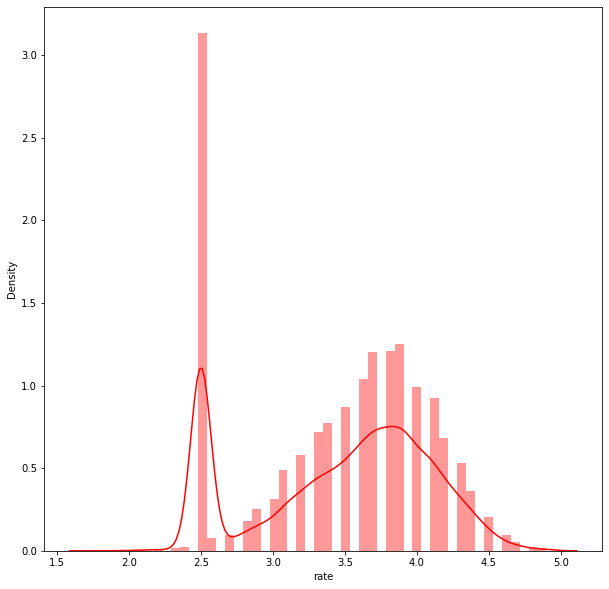

In [27]:
plt.figure(figsize = (10, 10))
sns.distplot(data['rate'], color = 'red')

As discussed before '2.5' represents the 'NEW' restaurants, and there were about 9800 restaurants that were NEW, that's why the above distribution is multi-modal. If we ignore the 'NEW' Restaurants we can observe that the graph resembles bell-shape i.e it's normally distributed.

C:\Users\Prapti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rate', ylabel='count'>

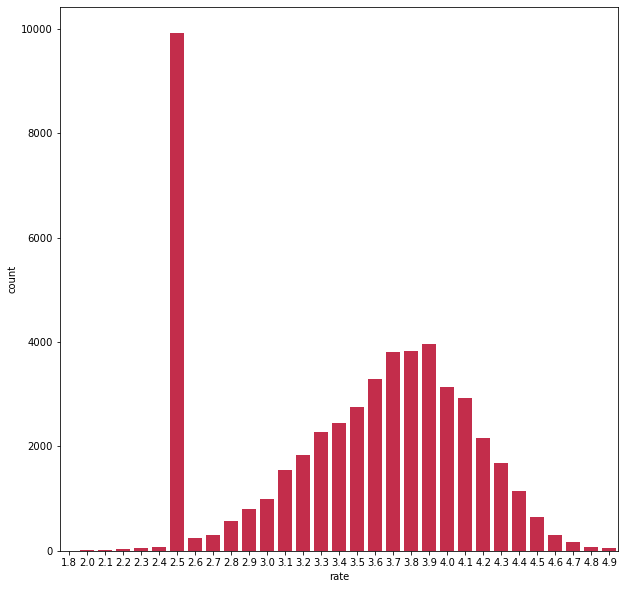

In [28]:
plt.figure(figsize = (10, 10))
sns.countplot(data['rate'], color = 'crimson')

Maximum of the restaurants are pretty NEW. Apart from the recently opened restaurants, most of the Restaurants received 3.9 rating, followed by 3.7 and 3.8. Only a few restaurants have 4.8 or 4.9 rating. Let's see which are these restaurants.

In [29]:
print("Restaurants having the highest ratings are : \n", data.loc[(data['rate'] == 4.8) | (data['rate'] == 4.9)]['name'].unique())

Restaurants having the highest ratings are : 
 ["Brahmin's Coffee Bar" 'The Black Pearl' 'Byg Brewski Brewing Company'
 'Belgian Waffle Factory' "AB's - Absolute Barbecues" 'Flechazo'
 'Punjab Grill' 'Asia Kitchen By Mainland China' 'House Of Commons'
 'The Pizza Bakery' 'Milano Ice Cream' 'Barbeque Nation' 'Biergarten'
 "Chili's American Grill & Bar" 'O.G. Variar & Sons' 'The Globe Grub'
 'The Boozy Griffin'
 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine'
 'CTR' 'Barbecue by Punjab Grill']


As expected, these are restaurant chains that are present all around the globe. These restaurants are pretty amazing that's why they have the highest rating.

Note: The one restaurant having such a large name must have been parsed incorrectly by the creator.

# Name

The same restaurant chain can be present at different location. Let's first check the number of unique restaurant present in the city.

In [30]:
print("Total number of restaurants in Bengaluru are: ", len(data['name'].unique()))

Total number of restaurants in Bengaluru are:  8720


Let's see which restaurant have the highest number of outlets across the city.

Before we use code to find out, let's guess first which kind of restaurants can have the highest number of outlets. Most probably some coffe chain, or ice-cream chain or sweet shop or famous pizza chain like Dominos or Pizza Hut will be having the maximum number of outlets.

<AxesSubplot:>

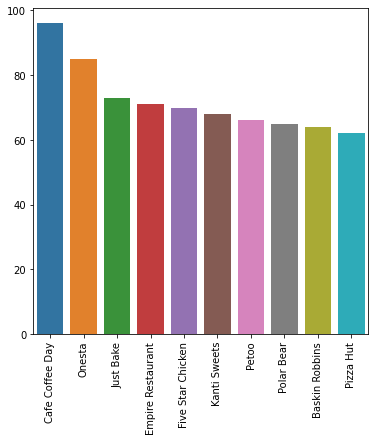

In [31]:
plt.figure(figsize = (6, 6))
data['name'].value_counts().head(10)
index = data['name'].value_counts().head(10).index
values = data['name'].value_counts().head(10).values
g = sns.barplot(x = index, y = values, data = data)
g.set_xticklabels(labels = index, rotation = 90)
g

Boom, our guess was pretty accurate. Cafe Coffee Day(a coffee chain) had the maximum number of outlets. Sweet shops like Kanti sweet or pizza chains like Pizza Hut also have a lot of outlets across the city.

Having a large number of outlets does not gurantee a higher rating. Let's see which restaurant chain have the highest rating grouping by their name.

In [32]:
data.groupby('name')['rate'].mean().sort_values(ascending = False).head(15)

name
Byg Brewski Brewing Company                                                         4.900000
Asia Kitchen By Mainland China                                                      4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine    4.900000
Punjab Grill                                                                        4.871429
Belgian Waffle Factory                                                              4.844828
O.G. Variar & Sons                                                                  4.800000
Flechazo                                                                            4.800000
The Pizza Bakery                                                                    4.800000
AB's - Absolute Barbecues                                                           4.789474
CTR                                                                                 4.750000
Barbecue by Punjab Grill                                         

We can see that the top 15 restaurants by ratings are completely different from those which have the highest number of outlets.

In [33]:
data.groupby('name')['votes', 'rate'].max().sort_values(ascending = False, by ='votes').head(15)

C:\Users\Prapti\AppData\Local\Temp/ipykernel_16064/3141099000.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('name')['votes', 'rate'].max().sort_values(ascending = False, by ='votes').head(15)


,votes,rate
name,,
Byg Brewski Brewing Company,16832,4.9
Toit,14956,4.7
Truffles,14726,4.7
AB's - Absolute Barbecues,12121,4.9
The Black Pearl,10550,4.8
Big Pitcher,9300,4.7
Onesta,9085,4.6
Arbor Brewing Company,8419,4.5
Empire Restaurant,8304,4.4


Above are the 15 restaurants that have got the highest number of user votes. The ratings for these restaurants are also very high as expected. More votes most probably leads to better rating.

In [34]:
names = data.groupby('name')['rate'].mean().sort_values(ascending = False).head(15).index
locations = []
for i in names:
    loc = []
    locations.append(data.loc[data['name'] == i]['location'].unique().tolist())
name_location = dict(zip(names, locations))
name_location

{'Byg Brewski Brewing Company': ['Sarjapur Road'],
 'Asia Kitchen By Mainland China': ['Koramangala 5th Block'],
 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine': ['Indiranagar'],
 'Punjab Grill': ['Whitefield', 'Malleshwaram'],
 'Belgian Waffle Factory': ['Brigade Road',
  'Koramangala 5th Block',
  'Vasanth Nagar',
  'Kalyan Nagar'],
 'O.G. Variar & Sons': ['Rajajinagar'],
 'Flechazo': ['Whitefield', 'Marathahalli'],
 'The Pizza Bakery': ['Indiranagar'],
 "AB's - Absolute Barbecues": ['Sarjapur Road',
  'Whitefield',
  'BTM',
  'Kalyan Nagar',
  'Marathahalli'],
 'CTR': ['Malleshwaram'],
 'Barbecue by Punjab Grill': ['Malleshwaram'],
 'The Black Pearl': ['Marathahalli', 'Koramangala 5th Block'],
 'House Of Commons': ['Koramangala 5th Block', 'HSR'],
 'Toit': ['Indiranagar'],
 'You Mee': ['Whitefield']}

Above is a list of the top 15 restaurants by rating and the locations where they are present.

# Online Order

In [35]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

The unique values for 'online_order' columns are 'Yes' or 'No'. These values needs to be converted to numerical 1 or 0.

In [36]:
# Converting to integer data type.
data['online_order'].replace({'Yes' : 1, 'No' : 0}, inplace =True)

C:\Users\Prapti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

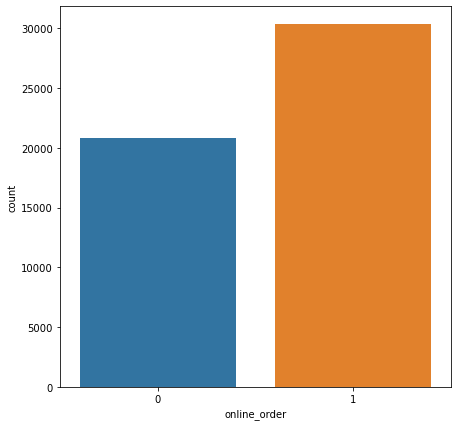

In [37]:
plt.figure(figsize = (7, 7,))
sns.countplot(data['online_order'])

In [38]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,rate
rate,1.000000
votes,0.406135
online_order,0.242004


Correlation of 'rating' with 'online_table' is 0.242.

<AxesSubplot:xlabel='online_order', ylabel='rate'>

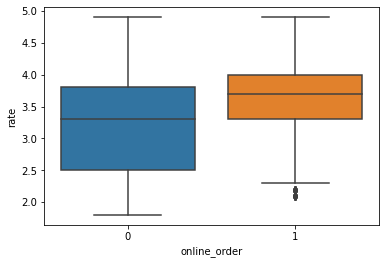

In [39]:
sns.boxplot(x = 'online_order', y = 'rate', data= data)

We can observe from the above plot that those restaurants which offer online order has a higher median rating as compared to those restaurants that don't.

As IQR for restaurants offering online order is much less than that of restaurants not offering online order, we can say that restaurants offering online order has better ratings in general.

# Book Table 

In [40]:
data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

Again we will need to change 'Yes' or 'No' to 1 or 0 respectively.

In [41]:
data['book_table'].replace({'Yes' : 1, 'No' : 0}, inplace = True)

In [42]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("red", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,rate
rate,1.000000
votes,0.406135
book_table,0.391537
online_order,0.242004


Book_table has a correlation of 0.39 with the ratings given.

C:\Users\Prapti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

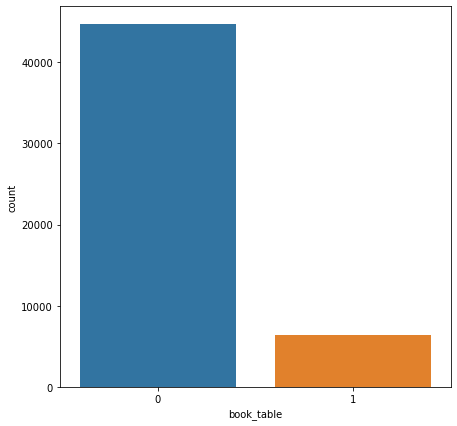

In [43]:
plt.figure(figsize = (7, 7))
sns.countplot(data['book_table'])

Wow, only 7500 restaurants books a table in advance. Rest of the 43000 restaurants don't book table in advance. Let's see if this affects the rating of the restaurant.

<AxesSubplot:xlabel='book_table', ylabel='rate'>

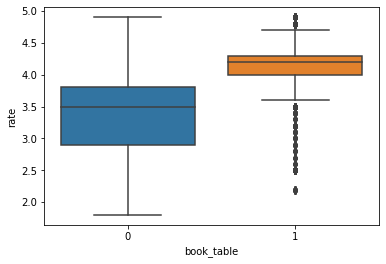

In [44]:
sns.boxplot(x = 'book_table', y = 'rate', data = data)

Eventhough there are some outliers for the book_table class, we can see that the lower whisker of '1''s boxplots which represents the minimum rating of the restaurants that book table in advance, is greater than the 50th percentile value or the median of the ratings of the restaurants that don't book table in advance.

Some restaurants that don't book table in advance also have ratings close to 5. The IQR for '1' boxplot is quite small which represents small variation of the ratings around median. Therefore, if the restaurants offer to book table in advance, more ratings are given.

# Approx Cost

Votes contains total number of rating for the restaurant.

In [45]:
print("Data type for Approximate cost is: ", data['approx_cost(for two people)'].dtype)

Data type for Approximate cost is:  object


We have to convert it into integer.

There are values like '1,200' we need to first convert such strings to '1200' then to 1200.

In [46]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x : x.replace(',',''))

In [47]:
data = data.astype({'approx_cost(for two people)' : int})
print(data['approx_cost(for two people)'].dtype)

int32


In [48]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("pink", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,rate
rate,1.000000
votes,0.406135
approx_cost(for two people),0.404836
book_table,0.391537
online_order,0.242004


In [49]:
data.groupby('name')['rate','approx_cost(for two people)'].mean().sort_values(by = 'rate', ascending = False).head(15)

C:\Users\Prapti\AppData\Local\Temp/ipykernel_16064/3450188505.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('name')['rate','approx_cost(for two people)'].mean().sort_values(by = 'rate', ascending = False).head(15)


,rate,approx_cost(for two people)
name,,
Byg Brewski Brewing Company,4.900000,1600.000000
Asia Kitchen By Mainland China,4.900000,1500.000000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000,1000.000000
Punjab Grill,4.871429,2000.000000
Belgian Waffle Factory,4.844828,400.000000
O.G. Variar & Sons,4.800000,200.000000
Flechazo,4.800000,1400.000000
The Pizza Bakery,4.800000,1200.000000
AB's - Absolute Barbecues,4.789474,1568.421053


We can observe some of the top-rated restaurants are quite expensive. Punjab Grill costs 1000 per person, whereas Taaza Thindi costs 50 per person.

Let's see the distribution of this feature.

C:\Users\Prapti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

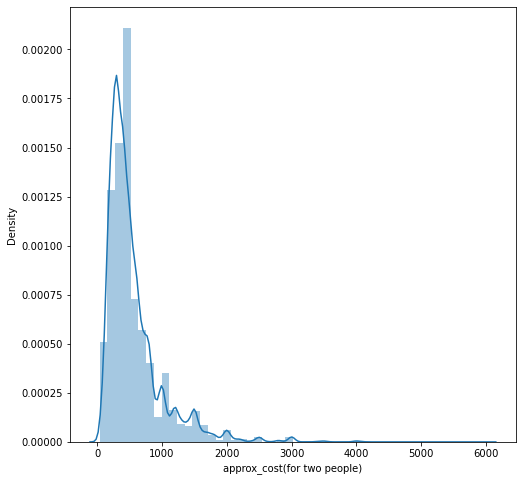

In [50]:
plt.figure(figsize = (8, 8))
sns.distplot(data['approx_cost(for two people)'])

Let's see which is the most expensive restaurant.

In [51]:
data['approx_cost(for two people)'].sort_values(ascending = False)

45618    6000
19139    6000
40266    5000
41591    4500
42141    4500
         ... 
17773      40
29785      40
14819      40
5270       40
18891      40
Name: approx_cost(for two people), Length: 51083, dtype: int32

In [52]:
print("The name of the most expensive restaurant is {} and it is located at {}".format(
data.loc[data['approx_cost(for two people)'] == data['approx_cost(for two people)'].max()]['name'].unique()[0],
data.loc[data['approx_cost(for two people)'] == data['approx_cost(for two people)'].max()]['location'].unique()[0]
))

The name of the most expensive restaurant is Le Cirque Signature - The Leela Palace and it is located at Old Airport Road


In [53]:
data['approx_cost(for two people)'].sort_values(ascending = False).head(15).unique()

array([6000, 5000, 4500, 4100, 4000])

Top 15 restaurants cost ran range from 4000 to 6000 Rupees for two people

# Location

Let's plot the unique places where thse restaurants are located. First we will use Geopy to get the latitudes and longitudes of a particular location. Geopy provides a class for popular mapping services. Once we get the lat and long, we will use Folium to plot them on the map

In [54]:
! pip install geopy


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim(user_agent="example app")

In [56]:
# Sample use
geolocator.geocode("Thippasandra, Bengaluru").point

Point(12.973936, 77.6509982, 0.0)

In [57]:
data['location'] = data['location'].apply(lambda x : x + ',Bengaluru')

In [58]:
locations = []
points = []
for i in data['location'].unique():
    # print(i)
    if geolocator.geocode(i):
        locations.append(i)
        points.append(geolocator.geocode(i).point)
    else:
        continue

In [59]:
location_point = {}
location_point['Locations'] = locations
location_point['Points'] = points

location_point = pd.DataFrame(location_point)

In [60]:
location_point

,Locations,Points
0,"Banashankari,Bengaluru","12 57m 55.0197s N, 77 35m 40.027s E"
1,"Basavanagudi,Bengaluru","12 56m 30.214s N, 77 34m 31.8076s E"
2,"Mysore Road,Bengaluru","12 56m 47.9828s N, 77 31m 48.3226s E"
3,"Jayanagar,Bengaluru","12 55m 45.3832s N, 77 34m 56.7224s E"
4,"Kumaraswamy Layout,Bengaluru","12 54m 29.3353s N, 77 33m 19.1444s E"
...,...,...
85,"West Bangalore,Bengaluru","12 56m 58.0403s N, 77 31m 1.56201s E"
86,"Magadi Road,Bengaluru","12 58m 32.1888s N, 77 33m 19.283s E"
87,"Yelahanka,Bengaluru","13 6m 2.51352s N, 77 35m 46.8434s E"
88,"Sahakara Nagar,Bengaluru","13 3m 43.7306s N, 77 34m 48.2209s E"


In [61]:
location_point[['lat', 'lon', 'altitude']] = pd.DataFrame(location_point['Points'].to_list())

In [62]:
location_point

,Locations,Points,lat,lon,altitude
0,"Banashankari,Bengaluru","12 57m 55.0197s N, 77 35m 40.027s E",12.965283,77.594452,0.0
1,"Basavanagudi,Bengaluru","12 56m 30.214s N, 77 34m 31.8076s E",12.941726,77.575502,0.0
2,"Mysore Road,Bengaluru","12 56m 47.9828s N, 77 31m 48.3226s E",12.946662,77.530090,0.0
3,"Jayanagar,Bengaluru","12 55m 45.3832s N, 77 34m 56.7224s E",12.929273,77.582423,0.0
4,"Kumaraswamy Layout,Bengaluru","12 54m 29.3353s N, 77 33m 19.1444s E",12.908149,77.555318,0.0
...,...,...,...,...,...
85,"West Bangalore,Bengaluru","12 56m 58.0403s N, 77 31m 1.56201s E",12.949456,77.517101,0.0
86,"Magadi Road,Bengaluru","12 58m 32.1888s N, 77 33m 19.283s E",12.975608,77.555356,0.0
87,"Yelahanka,Bengaluru","13 6m 2.51352s N, 77 35m 46.8434s E",13.100698,77.596345,0.0
88,"Sahakara Nagar,Bengaluru","13 3m 43.7306s N, 77 34m 48.2209s E",13.062147,77.580061,0.0


In [63]:
!pip install folium


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import folium

#Create a map object and centre it to the average coordinate to m
m = folium.Map(location = location_point[["lat","lon"]].mean().to_list(), zoom_start = 2)

for i in range(0,len(location_point)):
    folium.Marker([location_point.iloc[i]['lat'], location_point.iloc[i]['lon']]).add_to(m)
m

Make this Notebook Trusted to load map: File -> Trust Notebook


Please zoom into the map to see the unique places where restaurants are located. Two points are not present in Bengaluru, may be that's due to the wrong information returned by Geopy

In [65]:
data.groupby('location')['rate'].mean().sort_values(ascending = False).head(10)

location
St. Marks Road,Bengaluru           4.017201
Lavelle Road,Bengaluru             4.009943
Church Street,Bengaluru            3.931810
Sankey Road,Bengaluru              3.911111
Koramangala 5th Block,Bengaluru    3.896610
Koramangala 3rd Block,Bengaluru    3.857009
Cunningham Road,Bengaluru          3.855397
Rajarajeshwari Nagar,Bengaluru     3.850000
Langford Town,Bengaluru            3.807407
Race Course Road,Bengaluru         3.745324
Name: rate, dtype: float64

The above 10 locations have the best average ratings. These are the paces you must visit if you are a food lover.

# Cuisines

In [66]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In order to analyse the cuisine column, let's make a new column called 'Number_of_cuisines_offered'.

In [67]:
len(data['cuisines'][4].split(','))

2

In [68]:
data['Number_of_cuisines_offered'] = data['cuisines'].apply(lambda x : len(x.split(',')))

In [69]:
data.corr()

,online_order,book_table,rate,votes,approx_cost(for two people),Number_of_cuisines_offered
online_order,1.000000,-0.002504,0.242004,0.034114,-0.084069,0.106474
book_table,-0.002504,1.000000,0.391537,0.405981,0.618064,0.263471
rate,0.242004,0.391537,1.000000,0.406135,0.404836,0.247356
votes,0.034114,0.405981,0.406135,1.000000,0.381563,0.231998
approx_cost(for two people),-0.084069,0.618064,0.404836,0.381563,1.000000,0.268651
Number_of_cuisines_offered,0.106474,0.263471,0.247356,0.231998,0.268651,1.000000


In [70]:
correlation = data.corr()['rate'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("orange", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,rate
rate,1.000000
votes,0.406135
approx_cost(for two people),0.404836
book_table,0.391537
Number_of_cuisines_offered,0.247356
online_order,0.242004


Number of cuisines offered have very little correlation with the rating.

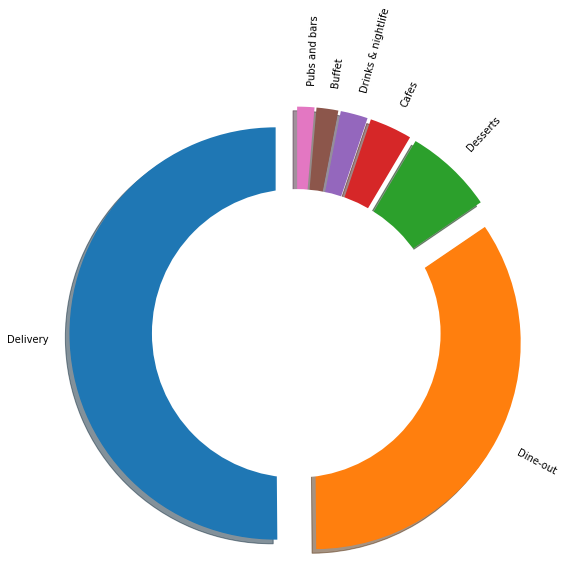

In [71]:
# Pie chart
labels = data['listed_in(type)'].value_counts().index
sizes = data['listed_in(type)'].value_counts().values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize = (8, 8))

ax1.pie(sizes, labels = labels,
        shadow = True, startangle = 90, explode = explode, rotatelabels = True)
centre_circle = plt.Circle((0, 0), 0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Majority of the restaurants Delivers the food to the homes, very less proportion are pubs and bars or Drinks & nightlife.

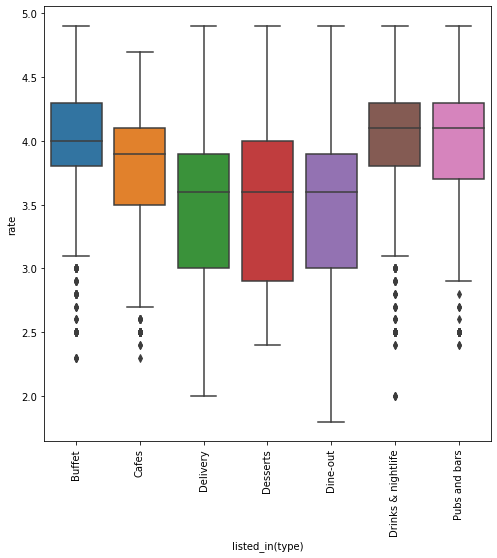

In [72]:
plt.figure(figsize = (8, 8))
g = sns.boxplot(x = 'listed_in(type)', y = 'rate', data = data)
plt.xticks(rotation = 90)
plt.show()

Majority of the Restaurants of type 'Drinks & nightlife' and 'Pubs and bars' have a high median rating. The median value of these kind of restaurants is greater than the 75th Percentile value of rest of the restaurant types except that of 'Buffet' type. The IQR is highest for 'Desserts' category which indicates large amount of variation about median.

# MODELS

In [73]:
#Encode the input Variables
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

zomato_en = Encode(data.copy())
zomato_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),Number_of_cuisines_offered
0,0,0,0,4.1,775,0,0,0,0,0,0,0,0
1,1,0,1,4.1,787,0,0,1,0,1,0,0,0
2,2,0,1,3.8,918,0,1,2,0,2,0,0,0
3,3,1,1,3.7,88,0,2,3,1,3,0,0,1
4,4,1,1,3.8,166,1,0,4,2,4,0,0,1


In [74]:
from sklearn.model_selection import train_test_split

x = zomato_en.iloc[:,[1,2,4,5,6,7,8,10]] 
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item
14566,1,0,410,17,17,724,20,0
21150,1,1,33,3,0,279,5,0
7258,1,1,0,30,2,38,17,0
19921,0,1,99,12,2,3,1,3316
23847,1,0,151,3,35,2149,34,0


### 1.Linear Regression

In [75]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2934613468548817

### 2.LASSO REGRESSION

In [76]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(x_train, y_train)

C:\Users\Prapti\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=10000, normalize=True)

In [77]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(x_train, y_train)

r2_score(y_test,lasso.predict(x_test))

0.29346119320434705

### 3.Decision TreeRegressor

In [78]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9191225949962704

### 4.Random Forest Regressor

In [79]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.9417583162263621

### 5.Gradient Boosting Regressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_predict=gbr.predict(x_test)



r2_score(y_test,y_predict)

0.7950949162635975

### 6.XGB Regressor

In [81]:
!pip install xgboost


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.8963328586459267

In [83]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), lasso.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.941758
2,Decision Tree,0.919123
5,XgBoost,0.896333
4,Gradient Boost,0.795095
0,Linear Regression,0.293461
1,Lasso Regression,0.293461


### THANK YOU !!